In [2]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
save_path = "r_files/model_summary_SA4"

In [58]:
state_code = "06"
data = {}
# ["PM2", "PM10", "O3"]
for pollutant in ["PM2", "PM10", "O3"]:
    if pollutant not in data:
        data[pollutant] = {}
    for lag in ["0-7", "0-14", "0-21"]:
        if lag not in data[pollutant]:
            data[pollutant][lag]= {}
        for case_type in ["COVID_mortality.csv", "COVID_cases.csv"]:
            if case_type not in data[pollutant][lag]:
                data[pollutant][lag][case_type]= []
            fname = "{}/gam_summary_{}_{}_{}_{}".format(save_path,pollutant, state_code, lag, case_type)
            f = open(fname, "r")
            next(f)
            significance = None
            for l in f:
                row = l.strip().split()
                if row and row[0] == 'pollutant':
                    intercept = row[1]
                    if "e" not in intercept.lower():
                        intercept = intercept[0:6]
                    pvalue = row[4]
                    if "e" not in pvalue.lower():
                        pvalue = pvalue[0:6]
                    if '*' in row[-1]:
                        significance = row[-1]
                        intercept= "{}{}".format(intercept, significance)
                    print(pollutant, lag, case_type, intercept, pvalue)
                    data[pollutant][lag][case_type] = [intercept, pvalue]
     
    
fw_name= "combined_summary.csv"
fw_path = "{}/{}".format(save_path, fw_name)
fw = open(fw_path, "w", newline='')
writer = csv.writer(fw)
header = ["Pollutant", "Feature", "lag(0-7)", "lag(0-7)",
         "lag(0-14)","lag(0-14)", "lag(0-21)", "lag(0-21)" ]
writer.writerow(header)
for pollutant in data:
    temp1, temp2 = [], []
    for lag in data[pollutant]:
        case = data[pollutant][lag]['COVID_cases.csv']
        deaths = data[pollutant][lag]['COVID_mortality.csv']
        temp1.extend([case[0], deaths[0]])
        temp2.extend([case[1], deaths[1]])

    row1 = [pollutant, "Intercept"]+temp1
    row2 = [pollutant, "P-value"]+temp2
    writer.writerow(row1)
    writer.writerow(row2)
fw.close()

PM2 0-7 COVID_mortality.csv -0.023* 0.0179
PM2 0-7 COVID_cases.csv -0.051* 0.0453
PM2 0-14 COVID_mortality.csv -0.050*** 0.0004
PM2 0-14 COVID_cases.csv -0.112** 0.0024
PM2 0-21 COVID_mortality.csv -0.094*** 3.78e-07
PM2 0-21 COVID_cases.csv -0.214*** 1.7e-05
PM10 0-7 COVID_mortality.csv -0.004 0.0659
PM10 0-7 COVID_cases.csv -0.018** 0.0026
PM10 0-14 COVID_mortality.csv -0.009*** 0.0003
PM10 0-14 COVID_cases.csv -0.039*** 1.14e-07
PM10 0-21 COVID_mortality.csv -0.015*** 1.03e-06
PM10 0-21 COVID_cases.csv -0.056*** 4.60e-10
O3 0-7 COVID_mortality.csv 3.5296 0.5946
O3 0-7 COVID_cases.csv -0.178*** 1.63e-12
O3 0-14 COVID_mortality.csv -0.330*** <
O3 0-14 COVID_cases.csv -62.02** 0.0066
O3 0-21 COVID_mortality.csv -19.14* 0.0412
O3 0-21 COVID_cases.csv -88.29*** 0.0005


In [49]:
save_path = "r_files/model_summary_SA3"

In [55]:
state_code = "06"
data = {}
# ["PM2", "PM10", "O3"]
p = ["PM2", "PM10", "O3"]
for pollutant in ["combined"]:
    for lag in ["0-7", "0-14", "0-21"]:
        for case_type in ["COVID_mortality.csv", "COVID_cases.csv"]:
            fname = "{}/gam_summary_{}_{}_{}_{}".format(save_path,pollutant, state_code, lag, case_type)
            f = open(fname, "r")
            next(f)
            significance = None
            for l in f:
                row = l.strip().split()
                if row and row[0] in p:
                    key = row[0]
                    if key not in data:
                        data[key] = {}
                    if lag not in data[key]:
                        data[key][lag]= {}
                    if case_type not in data[key][lag]:
                        data[key][lag][case_type]= []
                    intercept = row[1]
                    if "e" not in intercept.lower():
                        intercept = intercept[0:6]
                    pvalue = row[4]
                    if "e" not in pvalue.lower():
                        pvalue = pvalue[0:6]
                    if '*' in row[-1]:
                        significance = row[-1]
                        intercept= "{}{}".format(intercept, significance)
                    print(key, lag, case_type, intercept, pvalue)
                    data[key][lag][case_type] = [intercept, pvalue]
     
    
fw_name= "combined_summary.csv"
fw_path = "{}/{}".format(save_path, fw_name)
fw = open(fw_path, "w", newline='')
writer = csv.writer(fw)
header = ["Pollutant", "Feature", "lag(0-7)", "lag(0-7)",
         "lag(0-14)","lag(0-14)", "lag(0-21)", "lag(0-21)" ]
writer.writerow(header)
for pollutant in data:
    temp1, temp2 = [], []
    for lag in data[pollutant]:
        case = data[pollutant][lag]['COVID_cases.csv']
        deaths = data[pollutant][lag]['COVID_mortality.csv']
        temp1.extend([case[0], deaths[0]])
        temp2.extend([case[1], deaths[1]])

    row1 = [pollutant, "Intercept"]+temp1
    row2 = [pollutant, "P-value"]+temp2
    writer.writerow(row1)
    writer.writerow(row2)
fw.close()

PM2 0-7 COVID_mortality.csv -0.021* 0.0451
PM10 0-7 COVID_mortality.csv -0.003 0.1148
O3 0-7 COVID_mortality.csv 15.306* 0.0470
PM2 0-7 COVID_cases.csv -0.025 0.3362
PM10 0-7 COVID_cases.csv -0.014* 0.0298
O3 0-7 COVID_cases.csv 0.0594 0.2142
PM2 0-14 COVID_mortality.csv -0.027* 0.0492
PM10 0-14 COVID_mortality.csv -0.008** 0.0090
O3 0-14 COVID_mortality.csv 13.732 0.1457
PM2 0-14 COVID_cases.csv -0.052 0.1456
PM10 0-14 COVID_cases.csv -0.032*** 2.59e-05
O3 0-14 COVID_cases.csv 0.1275 0.2198
PM2 0-21 COVID_mortality.csv -0.058** 0.0022
PM10 0-21 COVID_mortality.csv -0.009** 0.0020
O3 0-21 COVID_mortality.csv 0.1487** 0.0016
PM2 0-21 COVID_cases.csv -0.138** 0.0038
PM10 0-21 COVID_cases.csv -0.046*** 4.04e-07
O3 0-21 COVID_cases.csv 0.3505** 0.0044


In [ ]:
"""
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);
"""


state_code = "06"
data = {}
# ["PM2", "PM10", "O3"]
for pollutant in ["PM2", "PM10", "O3"]:
    if pollutant not in data:
        data[pollutant] = {}
    for lag in ["0-7", "0-14", "0-21"]:
        if lag not in data[pollutant]:
            data[pollutant][lag]= {}
        for case_type in ["COVID_mortality.csv", "COVID_cases.csv"]:
            if case_type not in data[pollutant][lag]:
                data[pollutant][lag][case_type]= []
            fname = "{}/gam_summary_{}_{}_{}_{}".format(save_path,pollutant, state_code, lag, case_type)
            f = open(fname, "r")
            next(f)
            significance = None
            for l in f:
                row = l.strip().split()
                if row and row[0] == 'pollutant':
                    intercept = row[1]
                    if "e" not in intercept.lower():
                        intercept = intercept[0:6]
                    pvalue = row[4]
                    if "e" not in pvalue.lower():
                        pvalue = pvalue[0:6]
                    if '*' in row[-1]:
                        significance = row[-1]
                        intercept= "{}{}".format(intercept, significance)
                    print(pollutant, lag, case_type, intercept, pvalue)
                    data[pollutant][lag][case_type] = [intercept, pvalue]
     
    
fw_name= "combined_summary.csv"
fw_path = "{}/{}".format(save_path, fw_name)
fw = open(fw_path, "w", newline='')
writer = csv.writer(fw)
header = ["Pollutant", "Feature", "lag(0-7)", "lag(0-7)",
         "lag(0-14)","lag(0-14)", "lag(0-21)", "lag(0-21)" ]
writer.writerow(header)
for pollutant in data:
    temp1, temp2 = [], []
    for lag in data[pollutant]:
        case = data[pollutant][lag]['COVID_cases.csv']
        deaths = data[pollutant][lag]['COVID_mortality.csv']
        temp1.extend([case[0], deaths[0]])
        temp2.extend([case[1], deaths[1]])

    row1 = [pollutant, "Intercept"]+temp1
    row2 = [pollutant, "P-value"]+temp2
    writer.writerow(row1)
    writer.writerow(row2)
fw.close()

In [3]:
save_path = "r_files/model_summary"

In [4]:
state_code = "06"
data = {}
# ["PM2", "PM10", "O3"]
for pollutant in ["PM2", "PM10", "O3"]:
    if pollutant not in data:
        data[pollutant] = {}
    for lag in ["0-7", "0-14", "0-21"]:
        if lag not in data[pollutant]:
            data[pollutant][lag]= {}
        for case_type in ["COVID_mortality.csv", "COVID_cases.csv"]:
            if case_type not in data[pollutant][lag]:
                data[pollutant][lag][case_type]= []
            fname = "{}/gam_summary_{}_{}_{}_{}".format(save_path,pollutant, state_code, lag, case_type)
            f = open(fname, "r")
            next(f)
            significance = None
            for l in f:
                row = l.strip().split()
                if row and row[0] == 'pollutant':
                    intercept = float(row[1])
                    error = float(row[2])
                    data[pollutant][lag][case_type] = [intercept, error]
     
    

COVID_mortality.csv 0-7 -1.5792000000000002 CI -2.4998 -0.6586
COVID_mortality.csv 0-14 -3.1371999999999995 CI -4.4967999999999995 -1.7775999999999996
COVID_mortality.csv 0-21 -6.7179 CI -8.5929 -4.8429


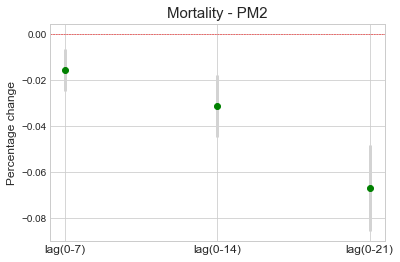

COVID_mortality.csv 0-7 -0.3097 CI -0.5282 -0.0912
COVID_mortality.csv 0-14 -0.7141 CI -0.9788 -0.44939999999999997
COVID_mortality.csv 0-21 -1.1594 CI -1.4786000000000001 -0.8402


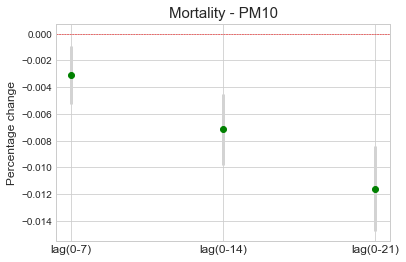

COVID_mortality.csv 0-7 246.8359 CI -369.02630000000005 862.6981000000001
COVID_mortality.csv 0-14 -393.1725 CI -1180.8277 394.4827
COVID_mortality.csv 0-21 5.768199999999999 CI 2.3757999999999995 9.160599999999999


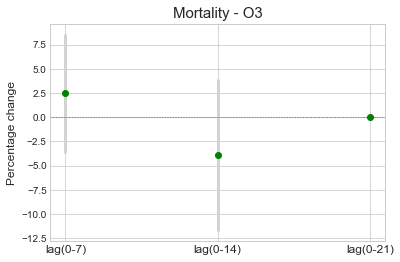

COVID_cases.csv 0-7 -4.5109 CI -7.013 -2.0088000000000004
COVID_cases.csv 0-14 -8.9063 CI -12.576900000000002 -5.2357000000000005
COVID_cases.csv 0-21 -18.2742 CI -23.2834 -13.264999999999999


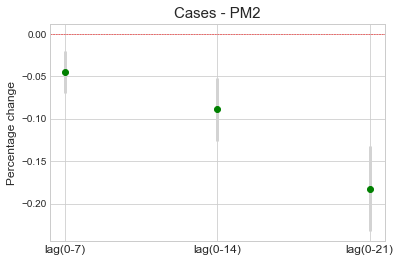

COVID_cases.csv 0-7 -1.6298 CI -2.2372 -1.0224
COVID_cases.csv 0-14 -3.5131999999999994 CI -4.2462 -2.7802
COVID_cases.csv 0-21 -5.1774000000000004 CI -6.0622 -4.2926


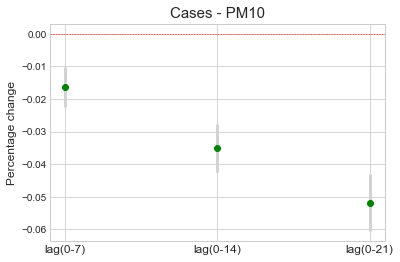

COVID_cases.csv 0-7 4.667000000000001 CI 0.8543000000000002 8.479700000000001
COVID_cases.csv 0-14 -5500.707899999999 CI -7669.453999999999 -3331.9618
COVID_cases.csv 0-21 -7214.1284 CI -9606.4413 -4821.8155


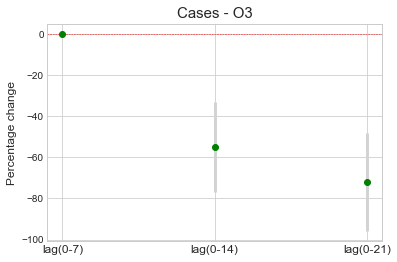

In [7]:
sns.set_style('whitegrid')
for case_type in ["COVID_mortality.csv", "COVID_cases.csv"]:
    for pollutant in ["PM2", "PM10", "O3"]:
        x, y, err = range(3), [], []
        for lag in ["0-7", "0-14", "0-21"]:
            value = data[pollutant][lag][case_type]
            print(case_type, lag, value[0]*100, "CI", (value[0]-value[1])*100, (value[0]+value[1])*100)
            y.append(value[0])
            err.append(value[1])
        plt.errorbar(x, y, yerr=err, fmt='o', color='green',
                 ecolor='lightgray', elinewidth=3, capsize=0)
        plt.axhline(y=0, linestyle='--', linewidth=0.5, color='r')
        plt.xticks(x, ['lag(0-7)', 'lag(0-14)', 'lag(0-21)'], size=12)
        plt.ylabel("Percentage change", size=12)
        case = case_type.split('_')[1].split('.')[0].capitalize()
        fname = "{} - {}".format(case, pollutant)
        plt.title(fname, size=15)
        # plt.savefig("manuscript_images/{}.png".format(fname.replace(" ", "_")), dpi=600, bbox_inches='tight')
        plt.show()